In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
diabetes_df = pd.read_csv('../datasets/diabetes_clean.csv')

In [3]:
sales_df = pd.read_csv('../datasets/advertising_and_sales_clean.csv')
sales_df = sales_df.drop(columns=['influencer'])

In [4]:
# diabetes_df_col = diabetes_df.columns.tolist()
# diabetes_df_col

In [5]:
# diabetes_df.head()

In [6]:
# diabetes_df = diabetes_df[: 5]
# diabetes_df

In [7]:
# x = diabetes_df.drop('glucose', axis=1).values

# x_new = x[:, 3]

#### `Creating features`
In this chapter, you will work with a dataset called __sales_df__, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. Here are the first two rows:

<table>
    <thead>
        <tr>
            <th></th>
            <th>TV</th>
            <th>Radio</th>
            <th>Social Media</th>
            <th>Sales</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>13000.0</td>
            <td>9237.76</td>
            <td>2409.57</td>
            <td>46677.90</td>
        </tr>
        <tr>
            <td>2</td>
            <td>41000.0</td>
            <td>15886.45</td>
            <td>2913.41</td>
            <td>150177.83</td>
        </tr>
    </tbody>
</table>

You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

- Create ___X___, an array of the values from the __sales_df__ DataFrame's "__radio__" column.
- Create ___y___, an array of the values from the __sales_df__ DataFrame's "__sales__" column.
- Reshape ___X___ into a _two-dimensional_ NumPy array.
- Print the shape of ___X___ and ___y___.

In [8]:
import numpy as np

# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
print('Shape of X before reshape: ',X.shape)
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

Shape of X before reshape:  (4546,)
(4546, 1) (4546,)


X.reshape(-1, 1): 
- -1: Biarkan NumPy menentukan ukuran untuk dimensi ini secara otomatis berdasarkan jumlah total elemen dalam array. Dalam hal ini, karena kita tahu ada 4546 elemen, NumPy akan mengatur dimensi pertama menjadi 4546. 
- 1: Ini menunjukkan bahwa kita ingin array hasil memiliki 1 kolom.
Hasilnya adalah array 2D dengan bentuk (4546, 1), yang berarti ada 4546 baris dan 1 kolom.

before:
- array(
  - [ 6566.23]
  - )

after:
- array([
  - [ 6566.23]
  - ])

#### `Building a linear regression model`
Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

___X___ and ___y___ have been preloaded for you as follows:

  - __y = sales_df["sales"].values__
  - __X = sales_df["radio"].values.reshape(-1, 1)__


- Import __LinearRegression__.
- Instantiate a linear regression model.- 
- Predict sales values using ___X___, storing as __predictions__.

In [9]:
y =  sales_df['sales'].values
X = sales_df['radio'].values.reshape(-1, 1)

In [10]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


See how sales values for the first five predictions range from $95,000 to over $290,000. Let's visualize the model's fit

#### `Visualizing a linear regression model`
Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between __radio__ advertising expenditure and __sales__ values.

The variables ___X___, an array of __radio__ values, ___y___, an array of __sales__ values, and __predictions__, an array of the model's predicted values for ___y___ given ___X___, have all been preloaded for you from the previous exercise.

- Import __matplotlib.pyplot__ as __plt__.
- Create a scatter plot visualizing ___y___ against ___X___, with observations in _blue_.
- Draw a _red_ line plot displaying the predictions against ___X___.
- Display the plot.

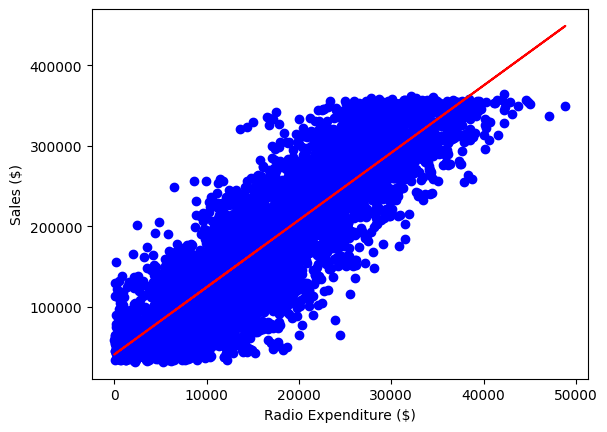

In [11]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

The model nicely captures a near-perfect linear correlation between radio advertising expenditure and sales! Now let's take a look at what is going on under the hood to calculate this relationship.

You learned about regression, a type of supervised learning where the target variable has continuous values. Specifically, you explored how to predict blood glucose levels and sales values based on advertising expenditure using linear regression. Key points include:

- Understanding regression tasks and their applications, such as predicting a country's GDP or the price of a house.
- Loading and preparing datasets for regression analysis, emphasizing the separation of features and target variables into distinct arrays.
- The process of reshaping feature arrays to meet scikit-learn's requirements, using NumPy's reshape method for proper model fitting.
- Implementing and interpreting linear regression models to establish relationships between variables, illustrated by predicting blood glucose levels from body mass index (BMI) and sales from radio advertising expenditure.
For example, to reshape an array and fit a linear regression model, you used:

  - __X = X.reshape(-1, 1)__
  - __reg = LinearRegression()__
  - __reg.fit(X, y)__

This code snippet reshapes the feature array X into a two-dimensional array, fits a linear regression model to the features X and target y, and is foundational for predicting continuous outcomes based on input features.

### `The basics of linear regression`

#### `Regression mechanics`
y = ax+b
- simple linreg use one features
  - y = target
  - x = single feature
  - a,b = parameters/coefficients of the model - slope, intercept
    - a = n(Σxy)−(Σx)(Σy) / n(Σx^2)−(Σx)^2
    - b = (Σy)(Σx^2)−(Σx)(Σxy) / n(Σx^2)−(Σx)^2 
  -Hhow do we choose a and b?
    - define an error function for any given line
    - choose the line that minimizes the error function
  - Error function = los function = cost function

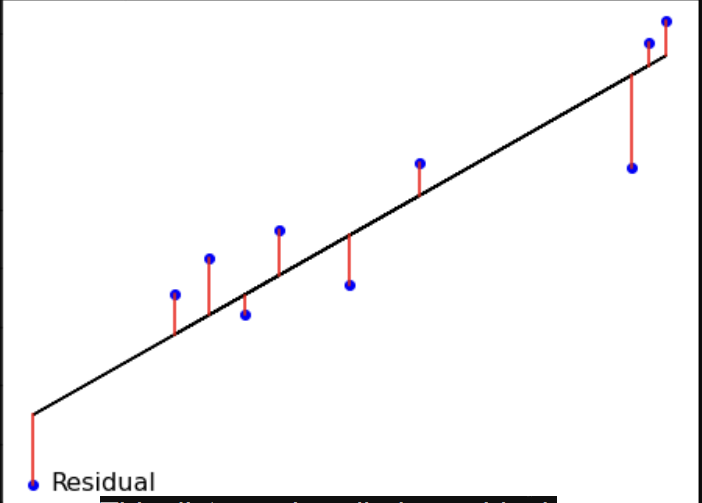

the vertical distance between it the line is called a residual, residual sum of squares (RSS).
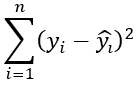

Linear Equation:
y = a1x1 + a2x2 + b
- tp fit a linear regression model here:
  - need to specify 3 variables: a1, a2, b

-in higher dimensions:
  - known as multiple regressions
  - must specify coefficient for each feature and variable b
    y = a1x1 + a2x2 + a3+x3 + ... + anxn + b

### `R-squared`
R^2 : quantifies hte variance in target values explaine by the features

### `Fit and predict for regression`
Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset, which has been preloaded for you. As a reminder, here are the first two rows:
  -      tv        radio      social_media    sales
  -     13000.0   9237.76    2409.57         46677.90
  -     41000.0   15886.45   2913.41         150177.83

You will then use this model to predict sales based on the values of the test features.

___LinearRegression___ and ___train_test_split___ have been preloaded for you from their respective modules.

In [12]:
sales_df.head()

,tv,radio,social_media,sales
0,16000.0,6566.23,2907.98,54732.76
1,13000.0,9237.76,2409.57,46677.90
2,41000.0,15886.45,2913.41,150177.83
3,83000.0,30020.03,6922.30,298246.34
4,15000.0,8437.41,1406.00,56594.18


- Create ___X___, an array containing values of all features in __sales_df__, and ___y___, containing all values from the "__sales__" column.
- Instantiate a linear regression model.
- Fit the model to the training data.
- Create __y_pred__, making predictions for __sales__ using the test features.

In [13]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


### `Regression performance`
Now you have fit a model, __reg__, using all features from __sales_df__, and made predictions of sales values, you can evaluate performance using some common regression metrics.

The variables __X_train, X_test, y_train, y_test,__ and __y_pred__, along with the fitted model, _reg_, all from the last exercise, have been preloaded for you.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

- Import __mean_squared_error__.
- Calculate the model's ___R-squared___ score by passing the test feature values and the test target values to an appropriate method.
- Calculate the model's root mean squared error using __y_test__ and __y_pred__.
Print __r_squared__ and __rmse__

#### `Cross-validation for R-squared`
_Cross-validation_ is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold _cross-validation_ to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the ___six-folds___.

The sales_df dataset has been split into y for the target variable, and ___X___ for the features, and preloaded for you. LinearRegression has been imported from sklearn.linear_model.

- Import __KFold__ and __cross_val_score__.
- Create kf by calling __KFold()__, setting the number of splits to six, _shuffle_ to __True__, and setting a seed of ___5___.
- Perform _cross-validation_ using __reg__ on ___X___ and ___y___, passing __kf__ to __cv__.
- Print the __cv_scores__.

In [14]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

#  Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


R-squared for each fold ranged between 0.74 and 0.77?

You learned about the fundamentals of linear regression, a statistical method used to model the relationship between a dependent variable and one or more independent variables. Key points included:

- __Simple Linear Regression__: You discovered that it involves modeling the relationship between two variables by fitting a linear equation to observed data. The equation is of the form ___(y = ax + b)___, where ___(y)___ is the _target variable_, ___(x)___ is the _feature_, and (___a___) and (___b___) are the _coefficients_ representing the _slope_ and _intercept_, _respectively_.

- __Ordinary Least Squares (OLS)__: You explored how OLS aims to minimize the sum of the squared differences (residuals) between the observed and predicted values, leading to the best-fitting line for the observed data.

- __Multiple Linear Regression__: You expanded your knowledge to include scenarios with more than one feature, understanding that each feature gets its coefficient, illustrating the model's ability to handle complex relationships.

- __Performance Metrics__: You learned about R-squared and root mean squared error ___(RMSE)___ as measures to assess the performance of your regression models. ___R-squared___ quantifies how well the features explain the variance in the target variable, while RMSE measures the average magnitude of the errors between predicted and actual values.

- __Practical Application__: Through exercises, you applied these concepts by creating a multiple linear regression model using the __LinearRegression__ class __from sklearn.linear_model__ to predict sales based on advertising expenditure. You practiced splitting data into training and test sets, fitting the model, making predictions, and evaluating model performance using R-squared and RMSE.



In [17]:
# Example of fitting a model and making predictions
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

This lesson equipped you with the foundational knowledge to build and evaluate linear regression models, setting the stage for more advanced topics in predictive modeling.

You learned about the importance and implementation of cross-validation in evaluating the performance of regression models, specifically to predict sales values based on advertising expenditure. Cross-validation helps overcome the limitations of a simple train-test split by using multiple splits of the data into training and testing sets, allowing for a more robust assessment of a model's performance.

- __Cross-validation Explained__: You discovered that cross-validation involves dividing the dataset into k parts (or folds), then systematically using each fold for testing while the remaining parts are used for training. This process is repeated k times, once for each fold, to ensure every data point has been used for both training and testing.

- __Implementing k-fold Cross-validation__: You learned to use ___KFold___ and __cross_val_score__ from __sklearn.model_selection__ for performing _6-fold_ cross-validation. This involves shuffling the dataset, setting a random seed for reproducibility, and then calculating cross-validation scores to assess model performance.

- __Analyzing Cross-validation Results__: You calculated the mean and standard deviation of the cross-validation scores to get a sense of the model's average performance and its variability. Additionally, you learned to calculate the 95% confidence interval of the scores, providing insight into the range within which the true model performance metric lies with 95% certainty.


In [16]:
# Example code for performing 6-fold cross-validation
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=6, shuffle=True, random_state=5)
cv_scores = cross_val_score(LinearRegression(), X, y, cv=kf)
print(np.mean(cv_scores)) 

0.9989896443678249


### `Lasso regression for feature importance`
In the video, you saw how lasso regression can be used to identify important features in a dataset.

In this exercise, you will fit a lasso regression model to the __sales_df__ data and plot the model's coefficients.

The feature and target variable arrays have been pre-loaded as ___X___ and ___y___, along with sales_columns, which contains the dataset's feature names.

In [30]:
sales_df = pd.read_csv('../datasets/advertising_and_sales_clean.csv',
                        usecols=['tv', 'radio', 'social_media','sales'])

sales_columns = sales_df[['tv', 'radio', 'social_media']].columns


X = sales_df.drop('sales', axis=1).values
y = sales_df['sales'].values

- Import __Lasso__ from __sklearn.linear_model__.
- Instantiate a _Lasso regressor_ with an ___alpha___ of ___0.3___.
- _Fit_ the model to the data.
- Compute the model's coefficients, storing as __lasso_coef__.


[ 3.56256962 -0.00397035  0.00496385]


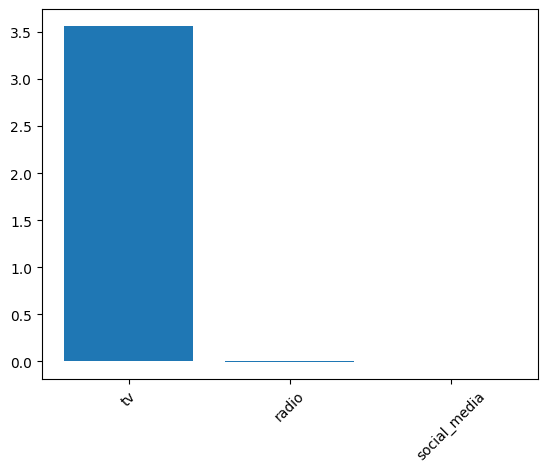

: 

In [32]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X,y).coef_

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

See how the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values! In the next chapter, we will learn how to further assess and improve our model's performance!